## Lab 4 - Analyzing Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to work with datasets in python using pandas library for data analysis using the provided data. 
For datasets like this it becomes hard to use Excel because of its size. If you learn how to work with pandas you'll be able to do basic analytical research much faster than in Excel.
To execute code IPython notebook click on the Cell and press Shift-Enter.
If you don't have any experience with Jupyter notebooks, please look at this tutorial: https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb

### Main objectives
After successful completion of the lab work students will be able to:
-	Analyze large datasets that don't work well in Excel using IPython notebook and pandas library
-   Find outliers and remove them in the datasets
-	Calculate different statistics on data fields


### Tasks
-	Calculate median and mean sell and rent prices in St. Petersburg
-   Find outliers: too cheap or too expensive apartments which seem to be a wrong data. Remove them from the dataset.
-	Find houses with the most cheapest and most expensive prices per square meter.
-   Analyze how many rent offers have the commission and what is the most popular commission



## Import of Libraries

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
import urllib

In [3]:
import seaborn as sns

## Uploading data to DataFrame

In [4]:
spb_df = pd.read_table('data/spb.real.estate.archive.2018.tsv')

In [5]:
spb_df.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
57685,992246099221475840,2016-04-23T00:00:00+03:00,2016-04-26T00:00:00+03:00,24000.0,6,False,2,False,50.0,9.0,32.0,40.0,0.0,2,2,"Россия, Санкт-Петербург, Будапештская улица, 72к3",5729094119176702056
164997,3559911485113345280,2017-05-08T00:00:00+03:00,2018-02-07T00:00:00+03:00,9150000.0,19,False,3,False,90.0,20.0,50.0,NaN,11.0,1,2,"Россия, Санкт-Петербург, Кушелевская дорога, 3к10",4155896670242509739
14229,295733926354241991,2015-09-27T00:00:00+03:00,2016-04-17T00:00:00+03:00,850000.0,3,False,2,False,35.0,5.0,29.0,NaN,0.0,1,2,"Россия, Ленинградская область, Волховский район, Новая Ладога, микрорайон В, 14",5804517301947178700
167366,5602222321868385280,2017-05-16T00:00:00+03:00,2017-05-23T00:00:00+03:00,12000.0,4,False,1,False,33.0,6.0,18.0,50.0,3.0,2,2,"Россия, Ленинградская область, Тосненский район, поселок городского типа Красный Бор, Комсомольская улица, 27к1",6284914938438152366
9507,2418616954678678074,2015-07-07T00:00:00+03:00,2016-09-05T00:00:00+03:00,3100000.0,2,False,1,False,35.0,9.0,17.0,NaN,0.0,1,2,"Россия, Санкт-Петербург, улица Десантников, 28",8725894282370683858


## Split data into Rent and Sell offers

In [6]:
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]

## Recreating rent dataframe cleaned from outliers, with only SPb offers left

In [7]:
# Creating new column with price per square meter for each offer
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

# Creating new dataframe with median price per square meter for each house
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

# Adding house median price per sq meter into main dataframe
rent_df = rent_df.merge(house_rent_df)

# Cleaning from expensive outliers
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                    & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                       | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

#Leaving only Saint-Petersburg apartments
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]

# Cleaning from cheap outliers
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 250) 
                               & (rent_df_cleaned.house_price_sqm_median/rent_df_cleaned.price_per_sq_m >= 2))]
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m < 200) 
                                          & (rent_df_cleaned.price_per_sq_m == rent_df_cleaned.house_price_sqm_median))]

<ipython-input-7-ac63d4e6f533>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area


### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
2. Calculate median and mean prices for apartments for sell before cleaning the data.
2. Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.
3. Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.
4. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

## 1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?

In [8]:
median_rent_price_before_cleaning = rent_df.last_price.median()
mean_rent_price_before_cleaning = rent_df.last_price.mean()

print("Rent median price before cleaning St.Petersburg: {}".format(median_rent_price_before_cleaning))
print("Rent mean price before cleaning St.Petersburg: {}".format(round(mean_rent_price_before_cleaning, 2)))

Rent median price before cleaning St.Petersburg: 25000.0
Rent mean price before cleaning St.Petersburg: 31719.26


In [9]:
median_rent_price_after_cleaning = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')].last_price.median()
mean_rent_price_after_cleaning = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')].last_price.mean()

print("Rent median price after cleaning St.Petersburg and from outliers: {}".format(median_rent_price_after_cleaning))
print("Rent mean price after cleaning St.Petersburg and from outliers: {}".format(round(mean_rent_price_after_cleaning, 2)))

Rent median price after cleaning St.Petersburg and from outliers: 25000.0
Rent mean price after cleaning St.Petersburg and from outliers: 32605.09


Median statistic remained unchanged, mean statistic changed because by design mean statistic is more sensitive to outliers, thus cleaning data from outliers coused the change in it.

## 2. Calculate median and mean prices for apartments for sell before cleaning the data.

In [10]:
median_sell_price_before_cleaning = sell_df.last_price.median()
mean_sell_price_before_cleaning = sell_df.last_price.mean()

print("Sell median price before cleaning: {}".format(median_sell_price_before_cleaning))
print("Sell mean price before cleaning: {}".format(round(mean_sell_price_before_cleaning, 2)))

Sell median price before cleaning: 4599000.0
Sell mean price before cleaning: 6969288.15


## 3. Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.

First let's calculate price per square meter for each apartment and median price per square meter for each house

In [11]:
# Creating new column with price per square meter for each offer
sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area

# Creating new dataframe with median price per square meter for each house
house_sell_df = sell_df.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

# Let's see medians for apartment sell price and price per sqm to understand what constitutes an outlier
print("Sell median price before cleaning: {}".format(sell_df.last_price.median()))
print("Sell median price per sqm before cleaning: {}".format(sell_df.price_per_sq_m.median()))

<ipython-input-11-ea7b5b7c5361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area


Sell median price before cleaning: 4599000.0
Sell median price per sqm before cleaning: 95214.28571428571


<AxesSubplot:xlabel='last_price'>

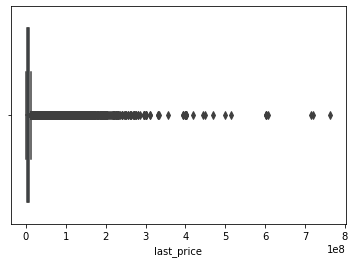

In [12]:
# Let's build a box plot for sell price to notice outliers visually

sns.boxplot(x=sell_df.last_price)

<AxesSubplot:xlabel='price_per_sq_m'>

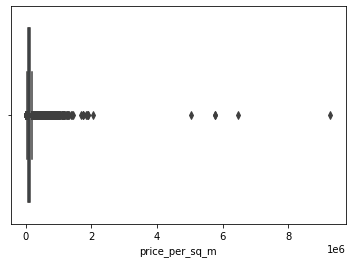

In [13]:
# Let's build a box plot for sell price to notice outliers visually

sns.boxplot(x=sell_df.price_per_sq_m)

In [14]:
# Adding house median price per sq meter into main dataframe
sell_df = sell_df.merge(house_sell_df)

# Cleaning from expensive outliers:
# Those offers where price per sqm is 5 times or more expensive than median price per sqm per house
sell_df_cleaned = sell_df[~((sell_df.price_per_sq_m/sell_df.house_price_sqm_median) > 5)]
# From boxplot for last_price - visually noticed outliers - those with price over 550 mln rubles 
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned.last_price < 5500000000]
# From boxplot for price_per_sqm - visually noticed outliers - those with price per sqm much over 2.5 mln rubles 
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned.price_per_sq_m < 2500000]
# Those offers where price per sqm is significantly higher than median for house,
# or is high and simultaneously is the only price for house (= equal to house median)
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m > 500000) 
                                    & ((sell_df_cleaned.house_price_sqm_median < 200000) 
                                       | (sell_df_cleaned.house_price_sqm_median == sell_df_cleaned.price_per_sq_m)))]

#Leaving only Saint-Petersburg apartments
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]

# Cleaning from cheap outliers
# Those offers where price per sqm is around 4 times or more cheaper than median price per sqm per house 
# - so less than 25K
sell_df_cleaned = sell_df_cleaned[sell_df_cleaned.price_per_sq_m > 25000]
# Those offers where price per sqm is low AND is significantly (twice or more times) lower than median for house
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 45000) 
                               & (sell_df_cleaned.house_price_sqm_median/sell_df_cleaned.price_per_sq_m >= 2))]
# Those offers where price per sqm is low and simultaneously is the only price for house (= equal to house median)
sell_df_cleaned = sell_df_cleaned[~((sell_df_cleaned.price_per_sq_m < 45000) 
                                          & (sell_df_cleaned.price_per_sq_m == sell_df_cleaned.house_price_sqm_median))]

### Recalculating houses price medians on the cleaned data and finding the cheapest and most expensive houses in Saint-Petersburg

Through groupby creating a dataframe with median sell price for each house on CLEANED data:

In [15]:
house_sell_df_cleaned = sell_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_sell_df_cleaned.rename(columns = {'price_per_sq_m': 'house_sell_price_sqm_median_cleaned'}, inplace = True)

#### Cheapest house:

In [16]:
cheapest_house = house_sell_df_cleaned[house_sell_df_cleaned.house_sell_price_sqm_median_cleaned == house_sell_df_cleaned.house_sell_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_sell_price_sqm_median_cleaned
7647,"Россия, Санкт-Петербург, Ломоносов, Дворцовый проспект, 16А",35740.786853


In [17]:
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9B%D0%BE%D0%BC%D0%BE%D0%BD%D0%BE%D1%81%D0%BE%D0%B2%2C%20%D0%94%D0%B2%D0%BE%D1%80%D1%86%D0%BE%D0%B2%D1%8B%D0%B9%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%2C%2016%D0%90/snyat/kvartira/


<b>Sanity check:</b>

From common sense, the prices in Lomonosov (where this cheapest house is located) can be this low, since it's a remote district VERY far from the city center. Let's look at our data from Lomonosov just in case, to get a general idea of a price range there.

In [18]:
# Let's look at Lomonosov offers
house_sell_df_cleaned[house_sell_df_cleaned.unified_address.str.contains('Ломоносов')].sort_values('house_sell_price_sqm_median_cleaned')

,unified_address,house_sell_price_sqm_median_cleaned
7647,"Россия, Санкт-Петербург, Ломоносов, Дворцовый проспект, 16А",35740.786853
7737,"Россия, Санкт-Петербург, Ломоносов, улица Костылева, 14",47619.047619
7758,"Россия, Санкт-Петербург, Ломоносов, улица Ломоносова, 12",48863.636364
7646,"Россия, Санкт-Петербург, Ломоносов, Дворцовый проспект, 16",49166.666667
7754,"Россия, Санкт-Петербург, Ломоносов, улица Красного Флота, 6к1",52485.659656
...,...,...
7688,"Россия, Санкт-Петербург, Ломоносов, Морская улица, 15",120192.307692
14360,"Россия, Санкт-Петербург, Центральный район, улица Ломоносова, 24",122340.136054
14352,"Россия, Санкт-Петербург, Центральный район, улица Ломоносова, 11-13",125431.380787
7783,"Россия, Санкт-Петербург, Ломоносов, улица Победы, 7",130813.953488


So our cheapest house is in fact the cheapest in Lomonosov, but not by a large margin: it's not that far in price per sqm from other Lomonosov offers, from which we can conclude it was a regular, sane offer. Possibly its rather, but not overly low price is explained by the state of the house itself, lack of renovation of both house and apartment and other factors

Thus we'll leave it as is.

#### Most expensive house:

In [19]:
most_expensive_house = house_sell_df_cleaned[house_sell_df_cleaned.house_sell_price_sqm_median_cleaned == house_sell_df_cleaned.house_sell_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_sell_price_sqm_median_cleaned
12696,"Россия, Санкт-Петербург, Санаторная аллея, 3",818152.92298


In [20]:
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(most_expensive_house.unified_address.iloc[0])))

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%A1%D0%B0%D0%BD%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D0%B0%D0%BB%D0%BB%D0%B5%D1%8F%2C%203/snyat/kvartira/


<b>Sanity check:</b> this maximum price seems reasonable and fair, since after checking the address on the map, the house is located on Kammenny ostrov in an elite/luxury district very close to the center of the city, so this does not seem to be an outlier.

### Checking resulting cleaned data with box plots

<AxesSubplot:xlabel='last_price'>

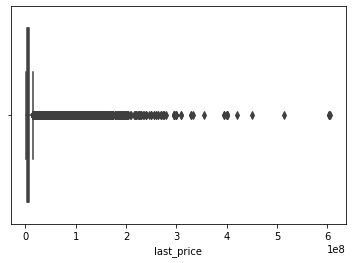

In [21]:
# Let's build a box plot for sell price to notice outliers visually

sns.boxplot(x=sell_df_cleaned.last_price)

<AxesSubplot:xlabel='price_per_sq_m'>

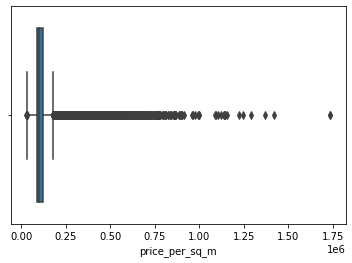

In [22]:
# Let's build a box plot for sell price to notice outliers visually

sns.boxplot(x=sell_df_cleaned.price_per_sq_m)

<b>Conclusion</b>: the situation after cleaning outliers looks better. We've gotten rid of offers looking most strange, suspicious and doubtful. Those offers with seemingly overly low and high prices are actually special cases where those prices are not due to mistakes or errors and can be reasonably explained by the nature of the offer: characteristics of apartments and houses such as house location (elite, central districts or, conversly, lower-class, remote from the center), apartment renovation (can be seen in photos for particular offers, for example cheapest and most expensive ones - links are provided above), and other characteristics.

Thus we conclude the sell dataset was cleaned from outliers.

## 4. Find the most expensive and the most cheapest apartment in St. Petersburg after cleaning outliers.

#### Cheapest apartment:

In [23]:
cheapest_apartment = sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.min()]
cheapest_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
185561,5365283220161389569,2018-04-24T00:00:00+03:00,2018-04-27T00:00:00+03:00,1100000.0,1,False,0,True,33.0,NaN,NaN,NaN,3.0,1,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Первомайская улица, 5к3",6931516357826986190,33333.333333,62500.0


From offer address and the map, it appears that the apartment in poselok Shushary, outside KAD (Saint-Petersburg Ring road), rather far from city center, in a lower-class district. From the cell above it's also clear it's a rather small studio, with renovation level rather low. So it seems its rather low price is reasonable, explainable, and does not raise concerns, thus this might actually truly be our genuine cheapest offer from the dataset after cleaning from outliers.

#### Most expensive apartment:

In [24]:
most_expensive_apartment = sell_df_cleaned[sell_df_cleaned.last_price == sell_df_cleaned.last_price.max()]
most_expensive_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
237351,8310251211233707984,2018-03-26T00:00:00+03:00,2018-08-20T00:00:00+03:00,605740032.0,2,False,5,False,443.0,10.0,248.0,0.0,NaN,1,2,"Россия, Санкт-Петербург, Южная дорога, 5",3312559599398519904,1.367359e+06,759301.442673


From offer address and the map, it appears that the apartment is located on Krestovsky ostrov, which is a rather elite district of Saint-Petersburg, so the high price is reasonable, explainable, and does not raise concerns, thus this might actually truly be our genuine most expensive offer from the dataset after cleaning from outliers.

## 5. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [25]:
# First we'll recreate the cleaned dataframe with house median prices per sqm for each house
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()

In [26]:
# Conducting a merge for median house prices per sqm between sell and rent offers
house_df = house_rent_df_cleaned.merge(house_sell_df_cleaned)

# Renaming price_per_sq_m columns to rent and price
house_df.rename({'price_per_sq_m': 'rent_price_per_sq_m', 'house_sell_price_sqm_median_cleaned': 'sell_price_per_sq_m'}, axis=1, inplace=True)

In [27]:
house_df

,unified_address,rent_price_per_sq_m,sell_price_per_sq_m
0,"Россия, Санкт-Петербург, 1-й Муринский проспект, 11",571.383648,102630.689500
1,"Россия, Санкт-Петербург, 1-й Муринский проспект, 13",500.000000,99834.656085
2,"Россия, Санкт-Петербург, 1-й Муринский проспект, 15",569.743935,91615.179391
3,"Россия, Санкт-Петербург, 1-й Муринский проспект, 17",600.000000,79189.163588
4,"Россия, Санкт-Петербург, 1-й Муринский проспект, 19",482.142857,97281.369639
...,...,...,...
16460,"Россия, Санкт-Петербург, шоссе Революции, 45",524.544180,82229.689662
16461,"Россия, Санкт-Петербург, шоссе Революции, 48",451.785714,84523.809524
16462,"Россия, Санкт-Петербург, шоссе Революции, 50",511.111111,83928.571429
16463,"Россия, Санкт-Петербург, шоссе Революции, 84к1",628.571429,84745.762712


In [28]:
# Counting years it takes to cover all money spent on buying apartment by renting it in a separate column

house_df['years_to_pay_back'] = house_df.sell_price_per_sq_m/house_df.rent_price_per_sq_m/12
house_df

,unified_address,rent_price_per_sq_m,sell_price_per_sq_m,years_to_pay_back
0,"Россия, Санкт-Петербург, 1-й Муринский проспект, 11",571.383648,102630.689500,14.968152
1,"Россия, Санкт-Петербург, 1-й Муринский проспект, 13",500.000000,99834.656085,16.639109
2,"Россия, Санкт-Петербург, 1-й Муринский проспект, 15",569.743935,91615.179391,13.400052
3,"Россия, Санкт-Петербург, 1-й Муринский проспект, 17",600.000000,79189.163588,10.998495
4,"Россия, Санкт-Петербург, 1-й Муринский проспект, 19",482.142857,97281.369639,16.814064
...,...,...,...,...
16460,"Россия, Санкт-Петербург, шоссе Революции, 45",524.544180,82229.689662,13.063674
16461,"Россия, Санкт-Петербург, шоссе Революции, 48",451.785714,84523.809524,15.590690
16462,"Россия, Санкт-Петербург, шоссе Революции, 50",511.111111,83928.571429,13.684006
16463,"Россия, Санкт-Петербург, шоссе Революции, 84к1",628.571429,84745.762712,11.235234


### Most effective house to invest

In [29]:
# Most effective to invest it will be in houses where it takes shortest to pay back price of apartment with rent

most_effective_house = house_df[house_df.years_to_pay_back==house_df.years_to_pay_back.min()]
most_effective_house

,unified_address,rent_price_per_sq_m,sell_price_per_sq_m,years_to_pay_back
14539,"Россия, Санкт-Петербург, улица Марата, 41",1750.0,91517.857143,4.357993


In [30]:
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(most_effective_house.unified_address.iloc[0])))

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%20%D0%9C%D0%B0%D1%80%D0%B0%D1%82%D0%B0%2C%2041/snyat/kvartira/


This is the most effective house to invest from our dataset, since it takes the shortest time to pay back the initial purchase price for the apartment from our dataset with rent fees - <b>less than 4 and a half years.</b>

### Most INeffective house to invest

In [31]:
# Most INeffective to invest it will be in houses where it takes LONGEST to pay back price of apartment with rent

most_ineffective_house = house_df[house_df.years_to_pay_back==house_df.years_to_pay_back.max()]
most_ineffective_house 

,unified_address,rent_price_per_sq_m,sell_price_per_sq_m,years_to_pay_back
1489,"Россия, Санкт-Петербург, Бронницкая улица, 27",628.685259,764861.111111,101.383681


In [32]:
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(most_ineffective_house.unified_address.iloc[0])))

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%91%D1%80%D0%BE%D0%BD%D0%BD%D0%B8%D1%86%D0%BA%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2027/snyat/kvartira/


This is the most INeffective house to invest from our dataset, since it takes the longestest time to pay back the initial purchase price for the apartment from our dataset with rent fees - <b>more than a century.</b>